In [1]:
#import sh
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import time
from matplotlib import dates as mdates
import xarray as xr
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
#create a nornmal plot
data=pd.read_csv('insitu_data.csv',parse_dates=[0]).tail(24)
y=data.iloc[:,1]
h_mo=np.asarray([float(h[9:13]) for h in y])
dates=data.iloc[:,0]

In [6]:
#Next job to plot the satellite data for the corresponding date/times at the lightship location
sat_file="global-analysis-forecast-wav-001-027_1620120297605.nc"
sat_data=nc.Dataset(sat_file)
print(sat_data['VHM0'])
print(sat_data['latitude'])

fig1 = plt.figure()
land_resolution = '50m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])
nps=ccrs.NorthPolarStereo()


<class 'netCDF4._netCDF4.Variable'>
float32 VHM0(time, latitude, longitude)
    long_name: Spectral significant wave height (Hm0)
    units: m
    standard_name: sea_surface_wave_significant_height
    cell_methods: time:point area:mean
    type_of_analysis: spectral analysis
    WMO_code: 100
    _ChunkSizes: [   1  681 1440]
unlimited dimensions: 
current shape = (64, 193, 685)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    standard_name: latitude
    long_name: latitude coordinate
    units: degrees_north
    axis: Y
    step: 0.08333588
    _ChunkSizes: 2041
    _CoordinateAxisType: Lat
    valid_min: 44.0
    valid_max: 60.0
unlimited dimensions: 
current shape = (193,)
filling on, default _FillValue of 9.969209968386869e+36 used


<Figure size 432x288 with 0 Axes>

C:\Users\docle\.conda\envs\autumn course\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


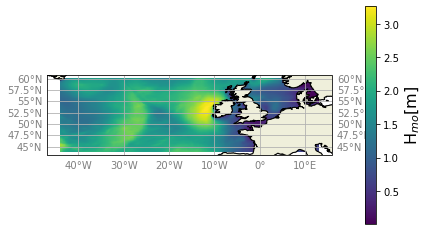

In [7]:

m = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 10, 'color': 'gray'}
g1.ylabel_style = {'size': 10, 'color': 'gray'}

f1=plt.pcolormesh(sat_data['longitude'],sat_data['latitude'],sat_data['VHM0'][0,:,:])
cbar = plt.colorbar(f1, orientation="vertical", fraction=0.05, pad=0.1)
cbar.set_label('H$_{mo}$[m]', fontsize=16)

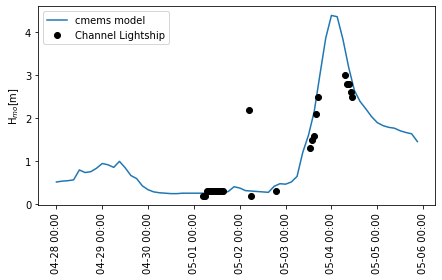

In [8]:
#Chanel Lightship is at 49.900 N 2.900 W so need to pick out this point!
ch_lat=49.9
ch_lon=-2.9
m.scatter([ch_lon],[ch_lat],transform=ccrs.PlateCarree(),c="red")
plt.tight_layout

#Next pull out a time series from the sat model
lon_index = np.argmin(np.abs(sat_data['longitude'][:]-ch_lon))
lat_index = np.argmin(np.abs(sat_data['latitude'][:]-ch_lat))

#convert the time variables
nc_time_var = sat_data.variables['time']
cal = nc_time_var.getncattr('calendar')
date_units = nc_time_var.getncattr('units')
dtime = nc.num2date(nc_time_var[:],date_units,calendar=cal, only_use_cftime_datetimes=False)

hmo_sat=sat_data['VHM0'][:,lat_index,lon_index]


plt.figure()
plt.plot(dtime,hmo_sat,label="cmems model")
plt.plot(dates,h_mo,linestyle="None",marker="o",color="black",label='Channel Lightship')
axes=plt.gca()
axes.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.xticks(rotation = 90)
plt.legend()
plt.tight_layout()
plt.ylabel('H$_{mo}$[m]')
plt.show()
